# 1.인물사진 합성

## 필요한 라이브러리 호출

In [2]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

(1280, 960, 3)


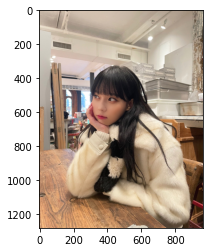

In [3]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/윈터셀카.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 7-4. 셸로우 포커스 만들기

In [4]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f9e0ff00d00>)

In [5]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
# 세그멘테이션 모델 생성

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path)
# 모델 이미지 입력

In [7]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)
# PASCAL VOC 데이터의 라벨 종류

21

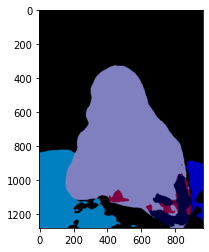

In [8]:
plt.imshow(output)
plt.show()

In [9]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
cat
chair
diningtable
dog
person


In [10]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]
# 사람을 나타내는 색상은?!

array([192, 128, 128])

In [12]:
seg_color = (128,128,192) 
# output은 BGR순서 but colormap은 RGB순이므로 바꿔줌

(1280, 960)


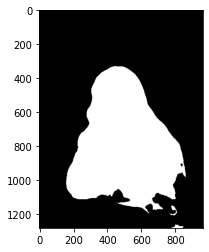

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

# 3채널 원본과는 다르게 채널 정보가 사라졌음

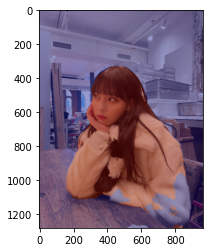

In [14]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 하기

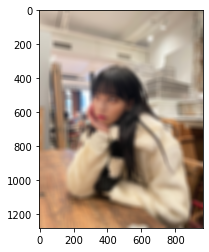

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (30,30))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
# 전체를 흐릿하게!

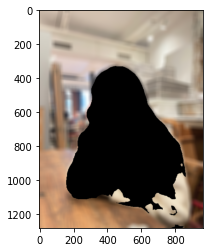

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) # 원래는 배경 0, 사람 255 -> 배경 255, 사람 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask) # 0과 bitwise_and 연산은 무조건 0이므로 사람이 0인 경우 사람 있는 픽셀이 모두 0이 된다.
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해 배경 추출

## 흐린 배경과 원본 영상 합성

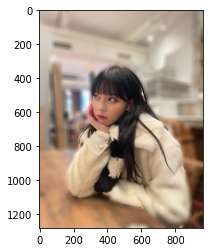

In [17]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()
# 합성!

# 2.고양이사진 합성

(367, 550, 3)


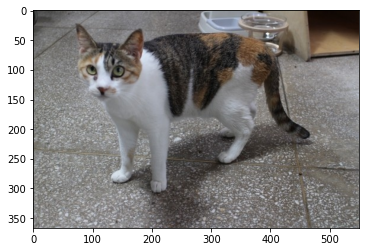

In [18]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/고양이사진.jpeg'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

## 셸로우 포커스 만들기

In [19]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f9d19662f40>)

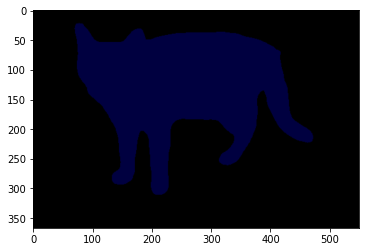

In [20]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
# 세그멘테이션 모델 생성

segvalues, output = model.segmentAsPascalvoc(img_path)
# 모델 이미지 입력

LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
# PASCAL VOC 데이터의 라벨 종류

plt.imshow(output)
plt.show()

In [21]:
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [22]:
colormap[8]
# 고양이를 나타내는 색상은?!

array([64,  0,  0])

In [23]:
seg_color = (0,0,64)
# output은 BGR순서 but colormap은 RGB순이므로 바꿔줌

(367, 550)


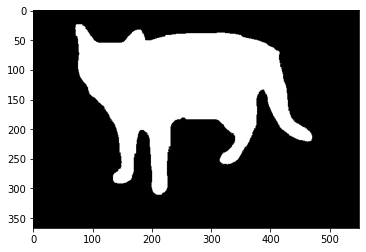

In [24]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

# 3채널 원본과는 다르게 채널 정보가 사라졌음

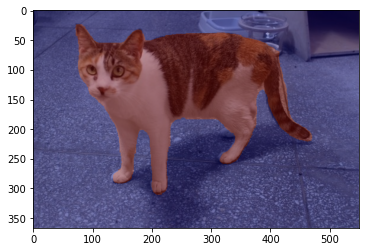

In [25]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

## 배경 흐리게 하기

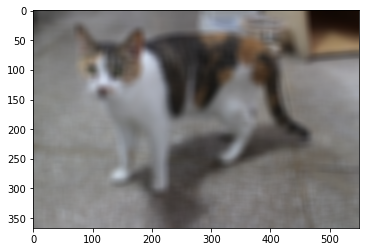

In [26]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (15,15))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()
# 전체를 흐릿하게!

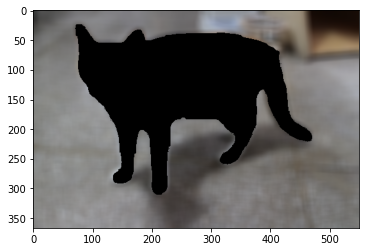

In [27]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color) # 원래는 배경 0, 사람 255 -> 배경 255, 사람 0
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask) # 0과 bitwise_and 연산은 무조건 0이므로 사람이 0인 경우 사람 있는 픽셀이 모두 0이 된다.
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()
# 흐려진 이미지에서 세그멘테이션 마스크를 이용해 배경 추출

## 흐린배경과 원본 형상 합성

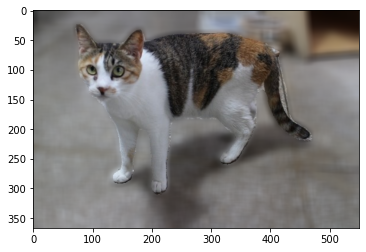

In [28]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()
# 합성!

# 3. 배경전환 크로마키사진

In [29]:
# 저장할 파일 이름을 결정합니다
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models'
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f9d19869910>)

(1280, 960, 3)


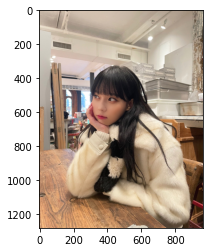

In [30]:
img_path = os.getenv('HOME')+'/aiffel/human_segmentation/images/윈터셀카.png'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(512, 516, 3)


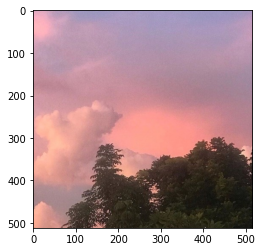

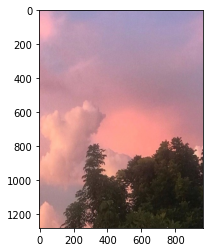

In [62]:
# 크로마키 입힐 이미지 입력
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/배경사진.jpeg'  
img_orig1 = cv2.imread(img_path2) 

print(img_orig1.shape)
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()

resize_img = cv2.resize(img_orig1,(960,1280), interpolation=cv2.INTER_AREA)
plt.imshow(cv2.cvtColor(resize_img, cv2.COLOR_BGR2RGB))
plt.show()

In [63]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
# 세그멘테이션 모델 생성

In [64]:
segvalues, output = model.segmentAsPascalvoc(img_path)
# 모델 이미지 입력

In [65]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)
# 세그멘테이션 모델 생성

In [66]:
segvalues1, output1 = model.segmentAsPascalvoc(img_path1)
# 모델 이미지 입력

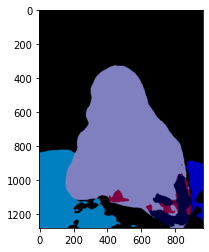

In [67]:
plt.imshow(output)
plt.show()

(1280, 960)


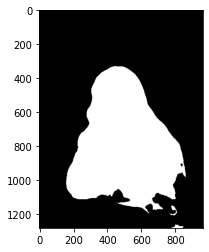

In [68]:
seg_color = (128,128,192)

seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

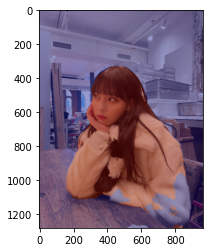

In [69]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

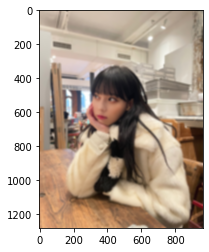

In [70]:
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

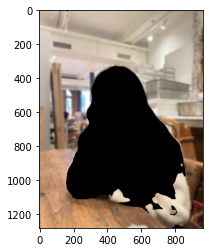

In [71]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

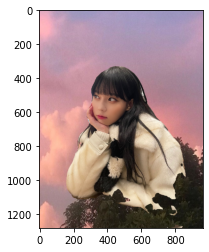

In [72]:
img_concat = np.where(img_mask_color==255, img_orig, resize_img)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 회고

## 1.결과물

1. 인물사진
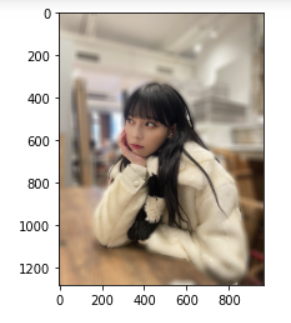

2. 고양이사진
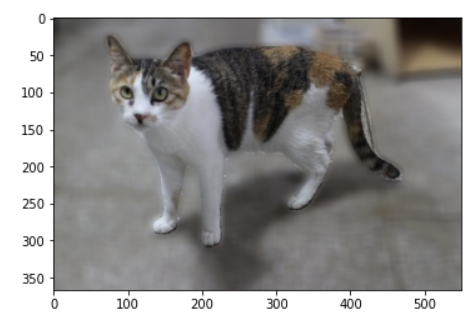

3. 크로마키 합성
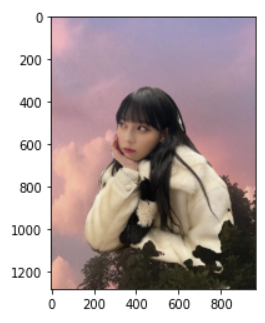

## 루브릭

1. 인물모드 사진을 성공적으로 제작하였다.  

    위에 사진 첨부!


2. 제작한 인물모드 사진들에서 나타나는 문제점을 정확히 지적하였다.

    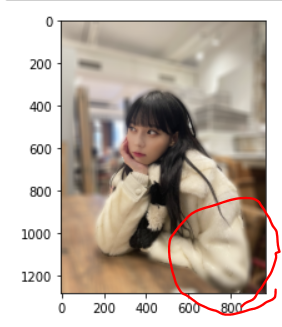  
    빨간 부분은 인물영역인데도 blur처리가 되어있다.  
    
    

3. 인물모드 사진의 문제점을 개선할 수 있는 솔루션을 적절히 제시하였다.  

    이 방법은 https://github.com/hyyoo3526/AIFFEL_EXPLORATION/blob/main/EXPLORATION_08/EXPLORATION_IC1_08_human_segmentation%20.ipynb 
    이곳을 참고해서 공부해봤지만 이해가 어려워서..구냥 포기했습니다ㅠㅠ

## 회고

2번 루브릭까지는 노드진행순서대로 해도 큰 어려움이 없었는데 루브릭 3번은 좀 어려웠다.. 여러 exploration을 보면서 공부를 했는데도 완전히 내것이 되지 못해서 가져올 수 없었다. 나중에 팀원들과 코드리뷰를 할 때 더 짅